In [1]:
from cellular_automata import * 
import matplotlib.pyplot as plt

In [2]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85

In [3]:
history_no_delay = simulate_tumor_growth(0, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

In [4]:
# time delay = 7
history_delay = simulate_tumor_growth(7, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

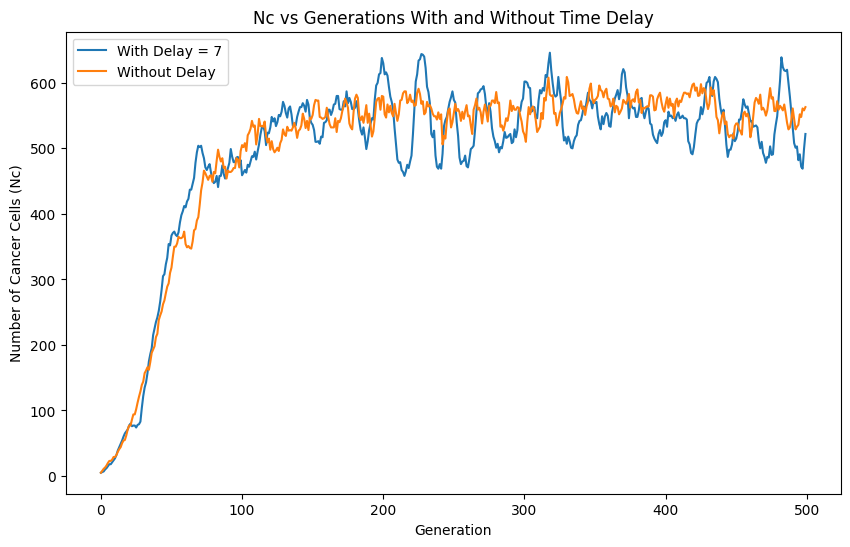

In [5]:
generations = list(range(GENERATIONS))
Nc_with_delay = [history_delay[g]['Nc'] for g in generations]
Nc_without_delay = [history_no_delay[g]['Nc'] for g in generations]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_with_delay, label='With Delay = 7')
plt.plot(generations, Nc_without_delay, label='Without Delay')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()


# The Influence of Large τ and Delay-coordinate Reconstruction

In [17]:
GENERATIONS = 1500

In [18]:
'''Get Nc with delay and Nc without delay'''

history_no_delay = simulate_tumor_growth(0, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

# tau, which is time delay = 20
history_delay = simulate_tumor_growth(20, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

generations = list(range(GENERATIONS))
Nc_with_delay = [history_delay[g]['Nc'] for g in generations]
Nc_without_delay = [history_no_delay[g]['Nc'] for g in generations]

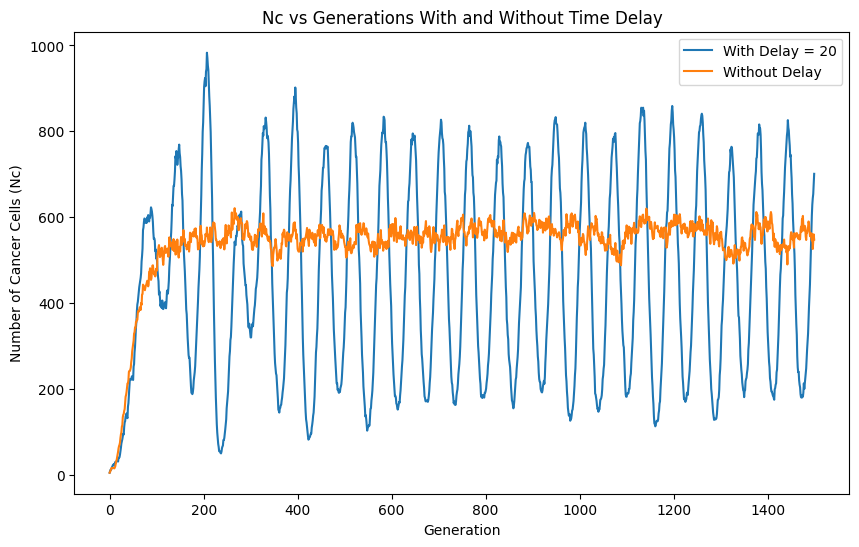

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_with_delay, label='With Delay = 20')
plt.plot(generations, Nc_without_delay, label='Without Delay')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()

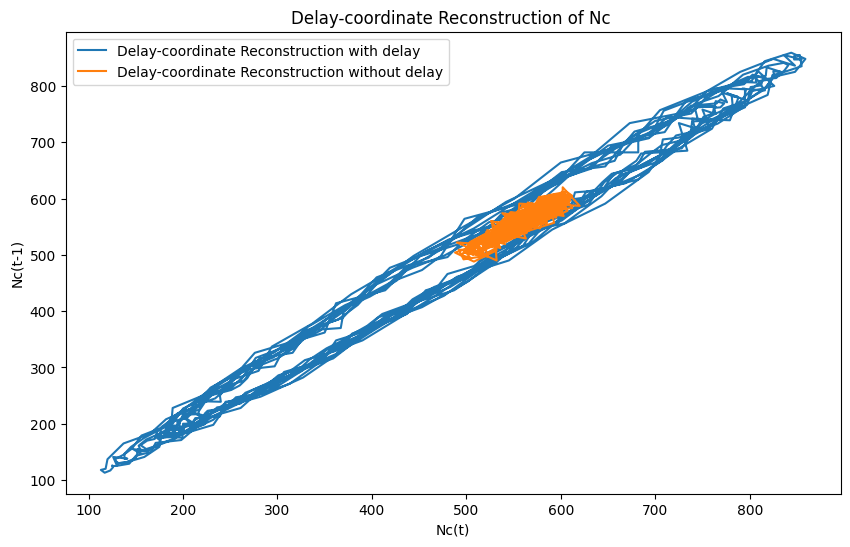

In [20]:
Nc_with_delay = Nc_with_delay[800:-1]
reconstructed_data_with_delay = delay_coordinates_reconstruction(Nc_with_delay, 1, 2)

Nc_without_delay = Nc_without_delay[800:-1]
reconstructed_data_without_delay = delay_coordinates_reconstruction(Nc_without_delay, 1, 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reconstructed_data_with_delay[:, 1], reconstructed_data_with_delay[:, 0], label = "Delay-coordinate Reconstruction with delay")
plt.plot(reconstructed_data_without_delay[:, 1], reconstructed_data_without_delay[:, 0], label = "Delay-coordinate Reconstruction without delay")


plt.xlabel('Nc(t)')
plt.ylabel('Nc(t-1)')
plt.title('Delay-coordinate Reconstruction of Nc ')
plt.legend()
plt.show()
